<a href="https://colab.research.google.com/github/choki0715/lecture/blob/master/IRIS_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# IRIS 데이터셋 가져오기
iris = datasets.load_iris()

# 데이터 시각화를 위해 특성 1, 2 (Sepal 길이 너비)만을 사용함
X = iris.data[:, :2]
y = iris.target


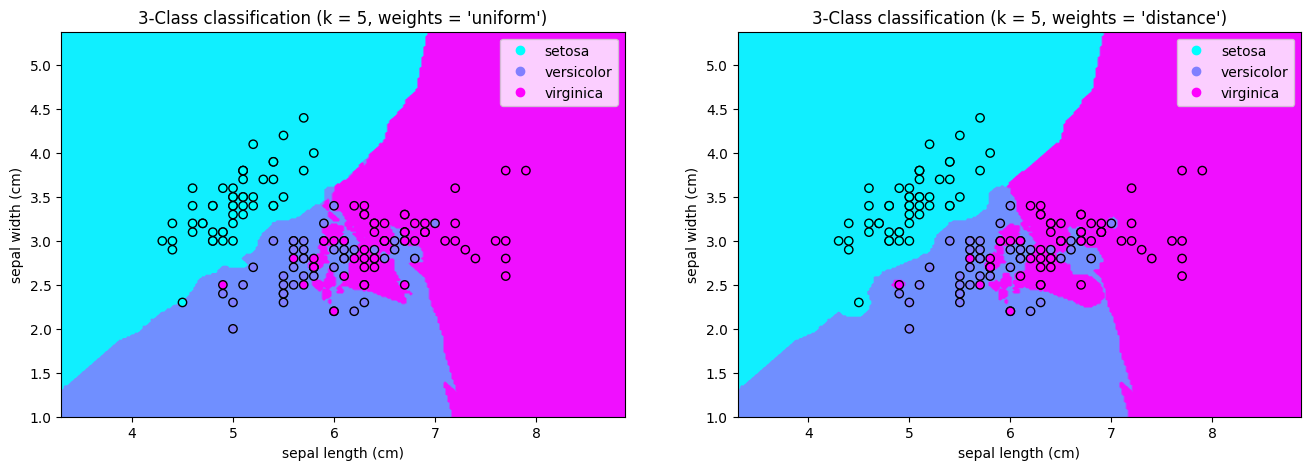

In [36]:
# 예상되는 데이터 영역을 h 크기의 메쉬형태로 구분
h = .02


n_neighbors = 5

# 결과를 비교하기 위해 두개 그림을 출력
fig, axs = plt.subplots(1,2, figsize=(16,5))

for idx, weights in enumerate(['uniform', 'distance']):
    # scitkit-learn에서 k-NN 모델을 가져옴
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # 데이터의 최대, 최소 영역을 설정
    x_min = X[:, 0].min() - 1
    x_max = X[:, 0].max() + 1

    y_min = X[:, 1].min() - 1
    y_max = X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # xx.ravel := xx.reshape(-1) --> 1차원 벡터로 평탄화
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Z를 다시 컨투어 가시과를 위해 메쉬 데이터로 복원
    Z_out = Z.reshape(xx.shape)

    # fig[idx]= plt.figure(figsize=(8, 6))
    axs[idx].contourf(xx, yy, Z_out, cmap='cool')

    # Plot also the training points
    scatter = axs[idx].scatter(x=X[:, 0], y=X[:, 1], cmap='cool', c=y,
                     label=iris.target_names[y], alpha=1.0, edgecolor="black")
    axs[idx].set_xlim(xx.min(), xx.max())
    axs[idx].set_ylim(yy.min(), yy.max())
    axs[idx].set_title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    axs[idx].set_xlabel(iris.feature_names[0])
    axs[idx].set_ylabel(iris.feature_names[1])

    # labels index --> 아이리스 이름으로 변환
    handles, labels = scatter.legend_elements(prop='colors')
    for i in [0,1,2]:
       labels[i] = iris.target_names[i]

    axs[idx].legend(handles, labels)
    #axs[idx].add_artist(legend)


plt.show()